# Analyzing Birmingham Parking data
http://archive.ics.uci.edu/ml/datasets/Parking+Birmingham#

In [19]:
import pandas as pd
from pandas import Grouper
import seaborn as sns

## Initialization

In [2]:
train=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00482/dataset.zip',
                 compression='zip')
train.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


In [3]:
train.describe()

,Capacity,Occupancy
count,35717.000000,35717.000000
mean,1397.550130,642.228911
std,1179.326833,656.955535
min,220.000000,-8.000000
25%,500.000000,210.000000
50%,849.000000,446.000000
75%,2009.000000,798.000000
max,4675.000000,4327.000000


## Data cleaning

In [4]:
train=train.rename(str.lower, axis='columns')

In [5]:
train.lastupdated = pd.to_datetime(train.lastupdated, infer_datetime_format=True)
#train.dtypes

systemcodenumber            object
capacity                     int64
occupancy                    int64
lastupdated         datetime64[ns]
dtype: object

## Visualizing data

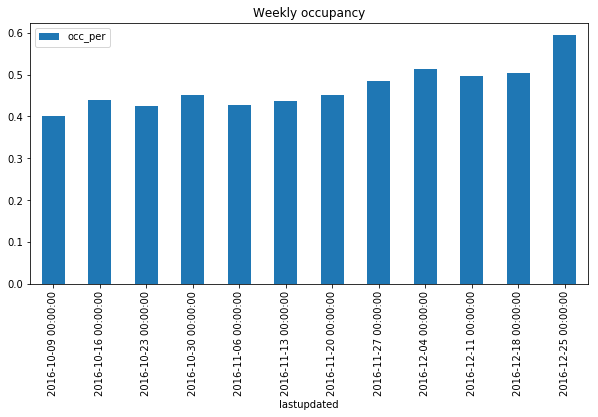

In [12]:
weekly=train.groupby(Grouper(key='lastupdated', freq='W')).sum()
weekly['occ_per'] = weekly.occupancy / weekly.capacity
weekly.plot.bar(y='occ_per', figsize=(10,4.8), title='Weekly occupancy')

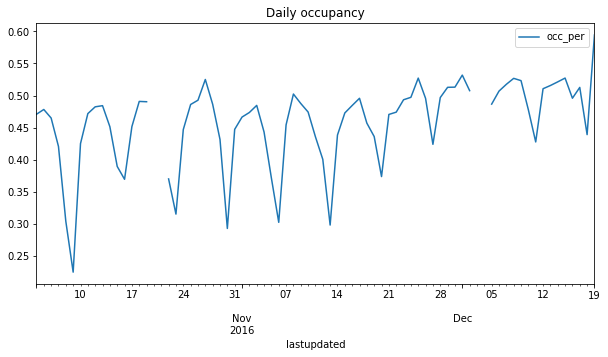

In [8]:
daily=train.groupby(Grouper(key='lastupdated', freq='D')).sum()
daily['occ_per'] = daily.occupancy / daily.capacity
daily.plot.line(y='occ_per', figsize=(10,4.8), title='Daily occupancy')

In [9]:
def isoweekday(x):
    return x.isoweekday()
#print(train.lastupdated.apply(isoweekday).head())

weekdays=train[train.lastupdated.apply(isoweekday) < 6]
#weekdays.head()
weekly.nlargest(10, 'occ_per')

,capacity,occupancy,occ_per
lastupdated,,,
2016-12-25,664632,395112,0.594482
2016-12-04,3508740,1798327,0.512528
2016-12-18,4787562,2409926,0.503372
2016-12-11,4731750,2346583,0.495923
2016-11-27,4898520,2367732,0.483357
2016-10-30,4908600,2217972,0.451854
2016-11-20,4909320,2214845,0.451151
2016-10-16,4671504,2050720,0.438985
2016-11-13,4899960,2139771,0.436692


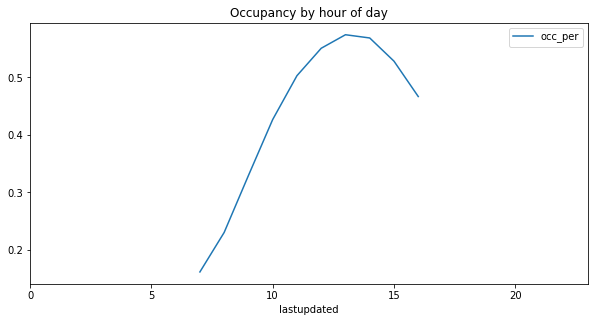

In [32]:
hourly=train.groupby(Grouper(key='lastupdated', freq='H')).sum()
hourly['occ_per'] = hourly.occupancy / hourly.capacity

hourly.groupby(hourly.index.hour).mean().nlargest(5, 'occ_per')
hourly.dropna()
hourly.groupby(hourly.index.hour).mean().plot.line(y='occ_per', title='Occupancy by hour of day',
                                                  figsize=(10,4.8))
# hourly.plot.line(y='occ_per', figsize=(13,4.8), title='Hourly occupancy')

## Feature engineering

In [10]:
ltrain=pd.DataFrame(columns=['systemcodenumber', 'capacity'])
ltrain['systemcodenumber'] = train.systemcodenumber.unique()
ltrain['capacity'] = train.capacity.unique()
ltrain.head()

,systemcodenumber,capacity
0,BHMBCCMKT01,577
1,BHMBCCPST01,317
2,BHMBCCSNH01,863
3,BHMBCCTHL01,387
4,BHMBRCBRG01,1010


In [11]:
ltrain.nlargest(5, 'capacity')

,systemcodenumber,capacity
24,Others-CCCPS133,4675
25,Others-CCCPS135a,3883
28,Others-CCCPS98,3103
18,Bull Ring,3053
26,Others-CCCPS202,2937
